<a href="https://colab.research.google.com/github/AlphaKaba24/African_Economy_Prediction/blob/main/africa_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AFRICAN GDP GROWTH PER YEAR**
##Alpha Kaba //

##**Import Libraries/Load Data**

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [24]:
africa_df = pd.read_csv('/content/ObservationData_lavlqce.csv')
africa_df.head()

,Country,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Malawi,1980,NaN,NaN,3038.14,2236.36,1104.30,238.76,865.54,306.24,...,21.48,-142.96,298.61,441.57,-6.39,13.35,19.75,-207.07,-9.26,NaN
1,Malawi,1981,-13.06,-10.81,2709.74,2236.40,1091.26,221.16,870.10,218.14,...,17.41,-133.47,276.61,410.09,-5.97,12.37,18.34,-86.71,-3.88,12.01
2,Malawi,1982,-0.93,1.44,2748.84,2113.68,1002.45,206.82,795.63,252.58,...,16.10,-119.21,254.71,373.92,-5.64,12.05,17.69,-91.15,-4.31,9.52
3,Malawi,1983,1.56,4.21,2864.70,2203.66,1037.06,200.81,836.26,278.87,...,15.73,-96.80,250.68,347.48,-4.39,11.38,15.77,-103.94,-4.72,13.77
4,Malawi,1984,0.54,3.92,2976.95,2157.88,1028.95,189.62,839.34,155.58,...,14.79,-78.94,239.30,318.24,-3.66,11.09,14.75,3.88,0.18,19.74


##**Data Prep**

In [3]:
africa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country                                                                2322 non-null   object 
 1   Year                                                                   2322 non-null   int64  
 2   Real per Capita GDP Growth Rate (annual %)                             2238 non-null   float64
 3   Real GDP growth (annual %)                                             2238 non-null   float64
 4   Gross domestic product, (constant prices US$)                          2292 non-null   float64
 5   Gross domestic product, current prices (current US$)                   2311 non-null   float64
 6   Final consumption expenditure  (current US$)                           2239 non-null   f

In [4]:
africa_df.describe

<bound method NDFrame.describe of        Country  Year  Real per Capita GDP Growth Rate (annual %)  \
0       Malawi  1980                                         NaN   
1       Malawi  1981                                  -13.060000   
2       Malawi  1982                                   -0.930000   
3       Malawi  1983                                    1.560000   
4       Malawi  1984                                    0.540000   
...        ...   ...                                         ...   
2317  Zimbabwe  2018                                    2.047585   
2318  Zimbabwe  2019                                   -7.326458   
2319  Zimbabwe  2020                                  -11.328102   
2320  Zimbabwe  2021                                    2.570616   
2321  Zimbabwe  2022                                    1.399660   

      Real GDP growth (annual %)  \
0                            NaN   
1                     -10.810000   
2                       1.440000   
3    

In [5]:
print(africa_df.shape[0])

2322


In [6]:
africa_df.duplicated().sum()

0

No duplicates luckily

In [19]:
africa_df.isna().sum()

Country                                                                    0
Year                                                                       0
Real per Capita GDP Growth Rate (annual %)                                 0
Real GDP growth (annual %)                                                 0
Gross domestic product, (constant prices US$)                              0
Gross domestic product, current prices (current US$)                       0
Final consumption expenditure  (current US$)                              49
General government final consumption expenditure (current US$)            49
Household final consumption expenditure (current US$)                     49
Gross capital formation (current US$)                                     49
Gross capital formation, Private sector  (current US$)                   123
Gross capital formation, Public sector  (current US$)                    123
Exports of goods and services (current US$)                               49

In [18]:
africa_df.dropna(subset=['Real GDP growth (annual %)'], inplace=True)

In [20]:
africa_df.dropna().shape[0]/africa_df.shape[0]

0.8994638069705094

In [22]:
africa_dfdropped = africa_df.dropna()

africa_dfnotdropped = africa_df.copy()

The missing values represent such a small amount of the data so imputing might help us out here but I decided to drop the rows as we only lose 10% of data.

In [8]:
africa_df['Real per Capita GDP Growth Rate (annual %)'].value_counts()

 1.970000     8
 1.340000     6
 3.290000     5
 0.880000     5
 2.290000     5
             ..
-10.973042    1
 6.317935     1
-21.365892    1
 29.747806    1
 1.399660     1
Name: Real per Capita GDP Growth Rate (annual %), Length: 1691, dtype: int64

In [9]:
africa_df['Country'].value_counts()

Malawi                      43
Sao Tome and Principe       43
Libya                       43
Madagascar                  43
Mali                        43
Mauritania                  43
Mauritius                   43
Morocco                     43
Mozambique                  43
Namibia                     43
Niger                       43
Nigeria                     43
Rwanda                      43
Senegal                     43
Algeria                     43
Seychelles                  43
Sierra Leone                43
Somalia                     43
South Africa                43
South Sudan                 43
Sudan                       43
Tanzania                    43
Togo                        43
Tunisia                     43
Uganda                      43
Zambia                      43
Liberia                     43
Lesotho                     43
Kenya                       43
Guinea-Bissau               43
Angola                      43
Benin                       43
Botswana

Cat values have no disrepancies
> I want to predict GDP Growth per year but regionally rather than country by country; I'll split the data before I impute, scale, etc.

In [13]:
Northern_countries = ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia']

Eastern_countries = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe']

Middle_countries = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']

Southern_countries = ['Botswana', 'eSwatini', 'Lesotho', 'Madagascar', 'Namibia', 'South Africa']

Western_countries = ['Benin', 'Burkina Faso', 'Cabo Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo' ]

region = ['Northern Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa']

In [12]:
africa_df['region'] = 'missing'

africa_df['region']

0       missing
1       missing
2       missing
3       missing
4       missing
         ...   
2317    missing
2318    missing
2319    missing
2320    missing
2321    missing
Name: region, Length: 2322, dtype: object

In [14]:
africa_df.loc[africa_df['Country'].isin(Northern_countries), 'region']= 'North Africa'

In [25]:
africa_df.loc[africa_df['Country'].isin(Eastern_countries), 'region']= 'East Africa'

In [26]:
africa_df.loc[africa_df['Country'].isin(Middle_countries), 'region']= 'Middle Africa'

In [27]:
africa_df.loc[africa_df['Country'].isin(Southern_countries), 'region']= 'South Africa'

In [28]:
africa_df.loc[africa_df['Country'].isin(Western_countries), 'region']= 'West Africa'

In [30]:
africa_df['region'].value_counts()

East Africa      731
West Africa      688
Middle Africa    387
South Africa     258
Name: region, dtype: int64

###**Train Test Split**

In [26]:
X = africa_df.drop(columns= ['Real GDP growth (annual %)', 'Year', 'Country'])

y = africa_df['Real GDP growth (annual %)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Instantiate Column selectors

In [27]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

Instantiate Transformers

In [33]:
Scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

###**EDA/Visualizations**

In [35]:
corr = africa_df.corr()

In [42]:
corr

,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,1.000000,0.063761,0.041216,0.174500,0.240496,0.251558,0.225989,0.247864,0.275313,0.280999,...,0.164432,-0.170258,0.214564,0.223371,0.082878,0.049484,-0.005445,-0.128232,-0.024588,-0.119335
Real per Capita GDP Growth Rate (annual %),0.063761,1.000000,0.991123,0.006307,0.015039,0.007579,0.007120,0.007402,0.017509,0.003464,...,0.104390,0.122423,0.042297,0.004614,0.226765,0.117266,-0.034120,0.132394,0.078234,-0.079517
Real GDP growth (annual %),0.041216,0.991123,1.000000,-0.006745,0.003373,-0.005492,-0.011987,-0.003926,0.004407,-0.008139,...,0.073225,0.129768,0.022639,-0.013798,0.233465,0.081596,-0.070313,0.131193,0.061548,-0.077006
"Gross domestic product, (constant prices US$)",0.174500,0.006307,-0.006745,1.000000,0.951286,0.934714,0.868079,0.915014,0.886057,0.847391,...,-0.177136,-0.608153,0.810986,0.833966,-0.004725,0.005982,0.014394,-0.133683,0.163885,-0.015346
"Gross domestic product, current prices (current US$)",0.240496,0.015039,0.003373,0.951286,1.000000,0.981425,0.869432,0.969591,0.920237,0.900744,...,-0.169434,-0.646592,0.813834,0.846847,-0.001086,-0.019241,-0.009510,-0.149608,0.147951,-0.028676
Final consumption expenditure (current US$),0.251558,0.007579,-0.005492,0.934714,0.981425,1.000000,0.856709,0.994085,0.888819,0.879210,...,-0.149653,-0.699842,0.788378,0.838025,-0.029394,-0.030228,-0.003023,-0.217583,0.109039,-0.028638
General government final consumption expenditure (current US$),0.225989,0.007120,-0.011987,0.868079,0.869432,0.856709,1.000000,0.795622,0.852166,0.833181,...,-0.105196,-0.621372,0.937630,0.944006,-0.033015,0.108162,0.122085,-0.232094,0.123460,-0.050754
Household final consumption expenditure (current US$),0.247864,0.007402,-0.003926,0.915014,0.969591,0.994085,0.795622,1.000000,0.864462,0.857101,...,-0.153613,-0.691098,0.728391,0.785357,-0.027570,-0.058271,-0.029255,-0.206704,0.102083,-0.022956
Gross capital formation (current US$),0.275313,0.017509,0.004407,0.886057,0.920237,0.888819,0.852166,0.864462,1.000000,0.936193,...,-0.128821,-0.588081,0.828511,0.845005,-0.005435,0.056080,0.060084,-0.181099,0.132931,-0.050596
"Gross capital formation, Private sector (current US$)",0.280999,0.003464,-0.008139,0.847391,0.900744,0.879210,0.833181,0.857101,0.936193,1.000000,...,-0.127698,-0.618516,0.807510,0.834101,-0.023307,0.044783,0.060233,-0.210053,0.116762,-0.047212


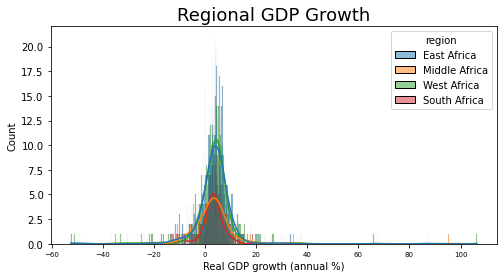

In [41]:
sns.histplot(data=africa_df, x= 'Real GDP growth (annual %)', hue='region', kde=True, bins=1000)
figsize=(199,199)
plt.title('Regional GDP Growth', fontsize = 18)
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["xtick.labelsize"] = 7

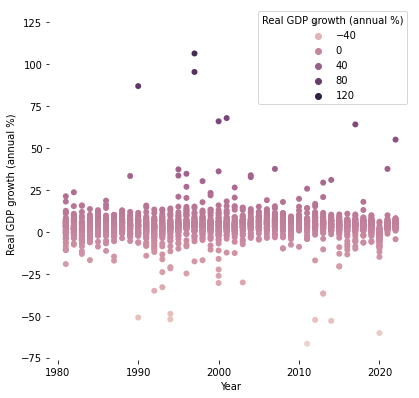

In [28]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='Year', y='Real GDP growth (annual %)', hue='Real GDP growth (annual %)',sizes=(1, 8), linewidth=0, data=africa_df, ax=ax);

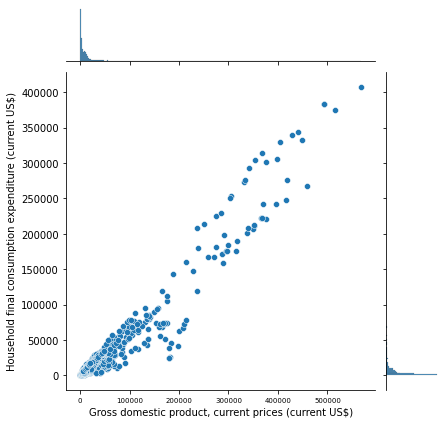

In [45]:
sns.jointplot(x=africa_df['Gross domestic product, current prices (current US$)'], y= africa_df['Household final consumption expenditure (current US$)'],data=africa_df);

I think I want my target to be GDP growth per year; as GDP seems to always be a common economic growth identifier.